In [ ]:
#Importation des bibliotheques necessaires

In [ ]:
#Librairies Keras pour la constructino du réseau CNN
from keras.models import Model, Sequential
import tensorflow as tf #plate-forme Open Source de bout en bout dédiée au machine learning.
from tensorflow import keras#nteragir avec les algorithmes de réseaux de neurones profonds
from tensorflow.keras import Sequential # type de modèle le plus simple est le Sequential modèle , une pile linéaire de couches
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization # 
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam


In [ ]:

import pandas as pd # charger et manipuler les données
import numpy as np# pour les tableaux et les matrices
import  seaborn as sns# bib pour visualisation de données Python basée sur matplotlib.
import matplotlib.pyplot as plt# bibliotheque pour visualisation des res
import pandas.util.testing as tm
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
cancer = datasets.load_breast_cancer()#charger dataset 





In [ ]:
print(cancer.DESCR)#La description complète de l'ensemble de données.
(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [ ]:
# 212 - Malignant, 357 - Benign


In [ ]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names) # feature_names= The names of the dataset columns.
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y = cancer.target #The classification target


In [ ]:
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
cancer.target_names # Les noms des classes cibles.


array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# split data into training and testing sections  :80% of our dataset for training purposes and 20% for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape


(455, 30)

In [ ]:
#
X_train.shape#  renvoie la taille du X_train





(455, 30)

In [ ]:
X_test.shape #renvoie la taille du X_test


(114, 30)

In [ ]:
#StandardScaler supprime la moyenne et l’échelle des données à la variance unitaire.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)#Ajuster aux données, puis les transformer.
X_test = scaler.transform(X_test)#Effectuer la standardisation par centrage et mise à l'échelle
X_train = X_train.reshape(455,30,1)
X_test = X_test.reshape(114, 30, 1)

In [ ]:
#1etape
#nombre de filtres de sortie utilisés dans l'opération de convolution =32
#  kernel_size = fenêtre convolutive =2 
#fonction d’activation linéaire rectifiée =relu 
#------------------------------------
# Couche de Convolution
# ------------------------------------

# Conv1D : https://keras.io/layers/convolutional/
#     filters : nombres de filtres de convolutions
#     kernel_size : taille des filtres de la fenêtre de convolution 
#     input_shape : taille de l'image en entrée (à préciser seulement pour la première couche)
#     activation  : choix de la fonction d'activation
# BatchNormalisation : permet de normaliser les coefficients d'activation afin de les maintenirs proche de 0 pour simplifier les calculs numériques
# MaxPooling : Opération de maxPooling sur des données spatiales (1D) :
# Dropout : permet de désactiver aléatoirement une proportion de neurones (afin d'éviter le surentrainement sur le jeu d'entrainement)

In [ ]:
#etapes de construire le modele CNN:
epochs = 100
#choix de modele sequentiel 
model = Sequential()# Le Sequential modèle est une pile linéaire de couches.
#1st Convolutional Layer 

model.add(Conv1D(filters=32, kernel_size=2, activation='relu' , input_shape = (30,1)))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.2)) 
 #2nd Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#------------------------------------
# Classifier (couche entièrement Connectée)
# Voir illustration ci-dessous
# ------------------------------------
# Flatten : conversion d'une matrice en un vecteur plat
# Dense   : neurones
model.add(Flatten())     # Applatissement de la sortie du réseau de convolution


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))# sigmoid :The takes a value as input and outputs another value between 0 and 1


In [ ]:
# Récapitulatif de l'architecture modèle
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_24 (Conv1D)           (None, 29, 32)            96        
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 14, 32)            0         
_________________________________________________________________
batch_normalization_32 (Batc (None, 14, 32)            128       
_________________________________________________________________
dropout_46 (Dropout)         (None, 14, 32)            0         
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 13, 64)            4160      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 6, 64)             0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 6, 64)           

In [ ]:
"""
La première convolution a une sortie avec forme (None, 31, 32) , où:

None est la taille du lot
31   la taille de l'image résultante
32 sont le nombre de filtres de cette convolution et aussi le nombre de canaux dans sa sortie

la premiere couche Conv1D(32, kernel_size=2, input_shape=(32,1))，Param=(2*1+1)*32 = 96.
La sortie de la mise en commun a une forme (None, 15, 32)  , elle a donc divisé la taille de votre image par deux, laissant le reste tel quel.

la deuxieme couche,Conv1D(64, 2, activation='relu')
After 32 convolution kernels in the first layer, the number of input data channels in the second layer is 32,
Param = (2 * 32 + 1) * 64 =  4160.
Ensuite, vous avez une couche de maxpool qui prend la sortie de la convolution comme entrée. 
"""



"\nLa première convolution a une sortie avec forme (None, 31, 32) , où:\n\nNone est la taille du lot\n31   la taille de l'image résultante\n32 sont le nombre de filtres de cette convolution et aussi le nombre de canaux dans sa sortie\n\nla premiere couche Conv1D(32, kernel_size=2, input_shape=(32,1))，Param=(2*1+1)*32 = 96.\nLa sortie de la mise en commun a une forme (None, 15, 32)  , elle a donc divisé la taille de votre image par deux, laissant le reste tel quel.\n\nla deuxieme couche,Conv1D(64, 2, activation='relu')\nAfter 32 convolution kernels in the first layer, the number of input data channels in the second layer is 32,\nParam = (2 * 32 + 1) * 64 =  4160.\nEnsuite, vous avez une couche de maxpool qui prend la sortie de la convolution comme entrée. \n"

In [ ]:
 une couche flatten, qui prend les images et les transformer en un seul vecteur,
prends  tout les  pixels de  toutes les chaines et  cree un 1D vecteur (ne pas  considerer batch size).
donc, an une entrée :  (None, 7, 64) sera  flattene à  (7*64) = 448 values.

Puis  la couche dense , la première avec 64 unités, la seconde avec une 1 unité. 

apres   (Flatten),  la deuxieme dense  (Dense), donc Param = (64 + 1) =  65.


le modèle a un total de 33,441 poids, tous entraînés.

In [ ]:


# Sélection de l'optimiser pour la decente de gradient
from keras.optimizers import Adam
#defines the loss function, the optimizer, and the metrics
model.compile(optimizer=Adam(lr=0.00005), loss = 'binary_crossentropy', metrics=['accuracy'])



In [ ]:
#Entrainement du modèle et évaluation
# Démarrage de l'entrainement du réseau
#epoch # nombre de boucle à réaliser sur le jeu de données complet
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_train, y_train), verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 99ms/step - loss: 1.2494 - accuracy: 0.4857 - val_loss: 0.7245 - val_accuracy: 0.5868
Epoch 2/100
15/15 [==============================] - 0s 26ms/step - loss: 1.0658 - accuracy: 0.5824 - val_loss: 0.7031 - val_accuracy: 0.5758
Epoch 3/100
15/15 [==============================] - 0s 27ms/step - loss: 0.9942 - accuracy: 0.5780 - val_loss: 0.6813 - val_accuracy: 0.6549
Epoch 4/100
15/15 [==============================] - 1s 37ms/step - loss: 0.8576 - accuracy: 0.6176 - val_loss: 0.6549 - val_accuracy: 0.7319
Epoch 5/100
15/15 [==============================] - 1s 35ms/step - loss: 0.7109 - accuracy: 0.6571 - val_loss: 0.6290 - val_accuracy: 0.7846
Epoch 6/100
15/15 [==============================] - 0s 28ms/step - loss: 0.7638 - accuracy: 0.6989 - val_loss: 0.6031 - val_accuracy: 0.8132
Epoch 7/100
15/15 [==============================] - 0s 32ms/step - loss: 0.6602 - accuracy: 0.7341 - val_loss: 0.5777 - val_accuracy: 0.8220
Epoch 

15/15 [==============================] - 0s 29ms/step - loss: 0.2827 - accuracy: 0.8967 - val_loss: 0.0923 - val_accuracy: 0.9648
Epoch 59/100
15/15 [==============================] - 0s 30ms/step - loss: 0.2537 - accuracy: 0.9077 - val_loss: 0.0910 - val_accuracy: 0.9648
Epoch 60/100
15/15 [==============================] - 0s 33ms/step - loss: 0.1818 - accuracy: 0.9275 - val_loss: 0.0905 - val_accuracy: 0.9648
Epoch 61/100
15/15 [==============================] - 0s 32ms/step - loss: 0.2040 - accuracy: 0.9297 - val_loss: 0.0895 - val_accuracy: 0.9670
Epoch 62/100
15/15 [==============================] - 1s 34ms/step - loss: 0.2143 - accuracy: 0.9143 - val_loss: 0.0884 - val_accuracy: 0.9670
Epoch 63/100
15/15 [==============================] - 1s 35ms/step - loss: 0.2330 - accuracy: 0.9055 - val_loss: 0.0876 - val_accuracy: 0.9670
Epoch 64/100
15/15 [==============================] - 0s 30ms/step - loss: 0.1789 - accuracy: 0.9319 - val_loss: 0.0868 - val_accuracy: 0.9670
Epoch 65/100

In [ ]:
#Affichage des courbes d'apprentissages
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

history.history

{'loss': [1.2493867874145508,
  1.0658365488052368,
  0.9942010045051575,
  0.8576401472091675,
  0.7109231352806091,
  0.7638497352600098,
  0.6601951122283936,
  0.6268244385719299,
  0.6300173401832581,
  0.6055171489715576,
  0.5326399803161621,
  0.4274199903011322,
  0.4722674489021301,
  0.475048303604126,
  0.474661260843277,
  0.43743500113487244,
  0.41399359703063965,
  0.38041481375694275,
  0.39680203795433044,
  0.28900575637817383,
  0.39937824010849,
  0.31536898016929626,
  0.3485396206378937,
  0.3258826434612274,
  0.319783091545105,
  0.3499804735183716,
  0.314111590385437,
  0.30742955207824707,
  0.3251672089099884,
  0.250680536031723,
  0.29382073879241943,
  0.28749921917915344,
  0.27130603790283203,
  0.29329609870910645,
  0.27771368622779846,
  0.23876000940799713,
  0.2707221806049347,
  0.27545544505119324,
  0.2390742152929306,
  0.2273535132408142,
  0.2779535949230194,
  0.22851021587848663,
  0.2795076370239258,
  0.2415308803319931,
  0.269456654787

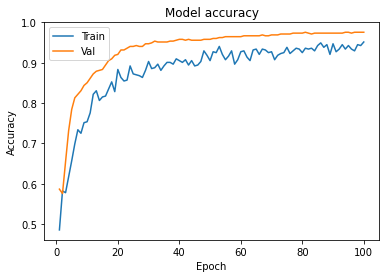

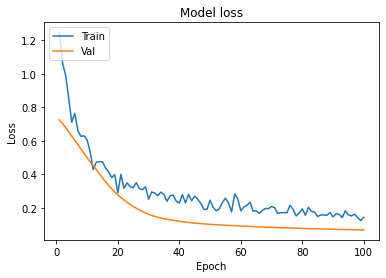

In [ ]:
plot_learningCurve(history, epochs)


In [ ]:
#Entrainement du modèle et évaluation
# Démarrage de l'entrainement du réseau
#epoch # nombre de boucle à réaliser sur le jeu de données complet
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 51ms/step - loss: 0.1406 - accuracy: 0.9451 - val_loss: 0.1302 - val_accuracy: 0.9649
Epoch 2/100
15/15 [==============================] - ETA: 0s - loss: 0.1310 - accuracy: 0.94 - 1s 34ms/step - loss: 0.1310 - accuracy: 0.9451 - val_loss: 0.1301 - val_accuracy: 0.9649
Epoch 3/100
15/15 [==============================] - 1s 49ms/step - loss: 0.1292 - accuracy: 0.9495 - val_loss: 0.1301 - val_accuracy: 0.9649
Epoch 4/100
15/15 [==============================] - 1s 40ms/step - loss: 0.1902 - accuracy: 0.9385 - val_loss: 0.1300 - val_accuracy: 0.9649
Epoch 5/100
15/15 [==============================] - 1s 33ms/step - loss: 0.1473 - accuracy: 0.9604 - val_loss: 0.1297 - val_accuracy: 0.9649
Epoch 6/100
15/15 [==============================] - 1s 36ms/step - loss: 0.1447 - accuracy: 0.9407 - val_loss: 0.1297 - val_accuracy: 0.9649
Epoch 7/100
15/15 [==============================] - 1s 46ms/step - loss: 0.1344 - accuracy: 0.9385 - val_

15/15 [==============================] - 0s 27ms/step - loss: 0.1127 - accuracy: 0.9604 - val_loss: 0.1321 - val_accuracy: 0.9649
Epoch 59/100
15/15 [==============================] - 0s 29ms/step - loss: 0.1515 - accuracy: 0.9538 - val_loss: 0.1317 - val_accuracy: 0.9649
Epoch 60/100
15/15 [==============================] - 0s 27ms/step - loss: 0.1050 - accuracy: 0.9560 - val_loss: 0.1317 - val_accuracy: 0.9649
Epoch 61/100
15/15 [==============================] - 0s 28ms/step - loss: 0.1379 - accuracy: 0.9495 - val_loss: 0.1317 - val_accuracy: 0.9649
Epoch 62/100
15/15 [==============================] - 0s 27ms/step - loss: 0.1351 - accuracy: 0.9473 - val_loss: 0.1321 - val_accuracy: 0.9649
Epoch 63/100
15/15 [==============================] - 0s 27ms/step - loss: 0.1080 - accuracy: 0.9648 - val_loss: 0.1324 - val_accuracy: 0.9649
Epoch 64/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0953 - accuracy: 0.9648 - val_loss: 0.1325 - val_accuracy: 0.9649
Epoch 65/100

In [ ]:
# Evaluation de la performance du modèle
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.1338, final accuracy: 0.9649


In [ ]:
Y_predict = model.predict(X_test)

Y_predict 

array([[3.1277537e-03],
       [5.5321934e-08],
       [7.1607232e-03],
       [9.9966037e-01],
       [3.2193333e-02],
       [9.6896172e-01],
       [1.0578930e-03],
       [9.9878752e-01],
       [9.9987674e-01],
       [1.4665084e-05],
       [1.4547706e-03],
       [9.9939513e-01],
       [7.6610136e-01],
       [9.9896955e-01],
       [9.5888066e-01],
       [9.2621325e-05],
       [1.6474724e-04],
       [9.9999607e-01],
       [2.5656819e-04],
       [7.1328580e-03],
       [9.9744630e-01],
       [8.1926125e-01],
       [9.9955201e-01],
       [9.9881124e-01],
       [9.9993545e-01],
       [2.0060705e-05],
       [1.3011694e-04],
       [6.0299265e-01],
       [4.5698457e-08],
       [9.9502325e-01],
       [3.4552813e-04],
       [9.9961340e-01],
       [1.8909872e-03],
       [9.9999523e-01],
       [9.9990392e-01],
       [9.9997318e-01],
       [9.9993593e-01],
       [6.6979752e-05],
       [9.9449861e-01],
       [9.9862373e-01],
       [7.3089861e-05],
       [9.993959

In [ ]:
Y_predict[0]

array([0.00312775], dtype=float32)

In [ ]:
Y_pred = np.argmax(Y_predict, axis=1)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
cm

array([[42,  0],
       [72,  0]], dtype=int64)

<AxesSubplot:>

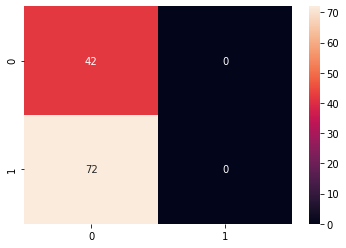

In [ ]:
sns.heatmap(cm , annot = True)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54        42
           1       0.00      0.00      0.00        72

    accuracy                           0.37       114
   macro avg       0.18      0.50      0.27       114
weighted avg       0.14      0.37      0.20       114



C:\Users\DELL\anaconda3\envs\p37env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Affichage des courbes de'test
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Test', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Test', 'Val'], loc='upper left')
  plt.show()

history.history

{'loss': [0.14055684208869934,
  0.13099440932273865,
  0.12916921079158783,
  0.19024252891540527,
  0.14731910824775696,
  0.14467741549015045,
  0.13440746068954468,
  0.1474972665309906,
  0.1260858178138733,
  0.11490724980831146,
  0.12916772067546844,
  0.19100725650787354,
  0.16097082197666168,
  0.13146133720874786,
  0.15913955867290497,
  0.1560625284910202,
  0.13673938810825348,
  0.1354038268327713,
  0.12985341250896454,
  0.08971158415079117,
  0.16239675879478455,
  0.11829390376806259,
  0.1258775293827057,
  0.12605516612529755,
  0.12128863483667374,
  0.12599022686481476,
  0.12690132856369019,
  0.12522120773792267,
  0.14868663251399994,
  0.1300717294216156,
  0.1220843717455864,
  0.152851402759552,
  0.10186684876680374,
  0.12857219576835632,
  0.1465982347726822,
  0.11874400079250336,
  0.13307370245456696,
  0.14153356850147247,
  0.11638963222503662,
  0.09927420318126678,
  0.11002562940120697,
  0.12980102002620697,
  0.12850050628185272,
  0.138915061

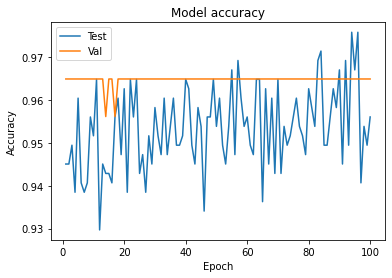

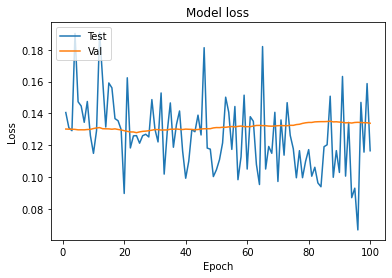

In [ ]:
plot_learningCurve(history, epochs)